In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
import numpy as np
from pathlib import Path
from scipy import signal

In [2]:
import os,glob
g = os.getcwd()
g
path = 'D:\\repos\\CIAT\\IDB_PROJECT'
os.chdir(path)

In [3]:
df = pd.read_csv("Data_IDB/alldf.csv")

# Sort Database by ID and DATE

In [4]:
df = df.sort_values(by=["ID","date"])

In [5]:
ID = np.unique(df.ID)
db = pd.DataFrame()
for fid in ID:
    df1 = df[df.ID==fid]
    dates = np.unique(df1.date)  
    for date in dates:
        df2 = df1[df1.date==date]
        df2 = df2[["NDVI","OSAVI","EVI","NWVI"]]
        if len(df2)>1:
            df2 = df2.apply(np.mean,0,result_type = "reduce")#result_type = "expand"
            df2["ID"] = fid
            df2["date"] = date
            db = pd.concat([db,df2.to_frame().T])
        else:
            df2["ID"] = fid
            df2["date"] = date
            db = pd.concat([db,df2])

In [7]:
# db.to_csv("Data_IDB/alldf_final.csv",index = False)

# Smoothing data

In [29]:
df = db[db.ID == 386311]
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

smootdf = df[["NDVI","OSAVI","EVI","NWVI"]]
smootdf = smootdf.apply(lambda x: signal.savgol_filter(x,9, 2, mode='nearest'),0,result_type='broadcast')
smootdf

df_c = pd.concat([df[["ID","date"]].reset_index(drop=True), smootdf.reset_index(drop=True)], axis=1)
df_c
melt_smooth = df_c.melt(["date","ID"], ["NDVI","OSAVI","EVI"] )
melt_smooth.head()


<ipython-input-29-4b1ea03e361e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


,date,ID,variable,value
0,2011-01-01,386311.0,NDVI,0.547851
1,2011-01-17,386311.0,NDVI,0.531710
2,2011-02-02,386311.0,NDVI,0.501240
3,2011-02-18,386311.0,NDVI,0.448159
4,2011-03-06,386311.0,NDVI,0.365371


In [30]:
melt_db = df.melt(["date","ID"], ["NDVI","OSAVI","EVI"])
melt_db.head()

,date,ID,variable,value
0,2011-01-01,386311.0,NDVI,0.549774
1,2011-01-17,386311.0,NDVI,0.521124
2,2011-02-02,386311.0,NDVI,0.536948
3,2011-02-18,386311.0,NDVI,0.441966
4,2011-03-06,386311.0,NDVI,0.401566


In [31]:
# sns.set_style("white")
rc={"font.weight":"bold",'figure.figsize':(30, 6),'axes.labelsize': 28, 
    'font.size': 28,'axes.titlesize': 28,'legend.fontsize': 18, 'axes.titlesize': 28,
   "lines.linewidth": 2.5,'font.sans-serif': "Times New Roman"}
# sns.set()
sns.set(style="white", rc=rc,font_scale = 1.8)

DATE = pd.DataFrame({
    'inside':['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01']
})

DATE['inside'] = pd.to_datetime(DATE['inside'], format='%Y-%m-%d')
# DATE
# sns.set_style("white")
# sns.set_context("paper",rc=rc,font_scale = 1.5)

# all time series Smooth

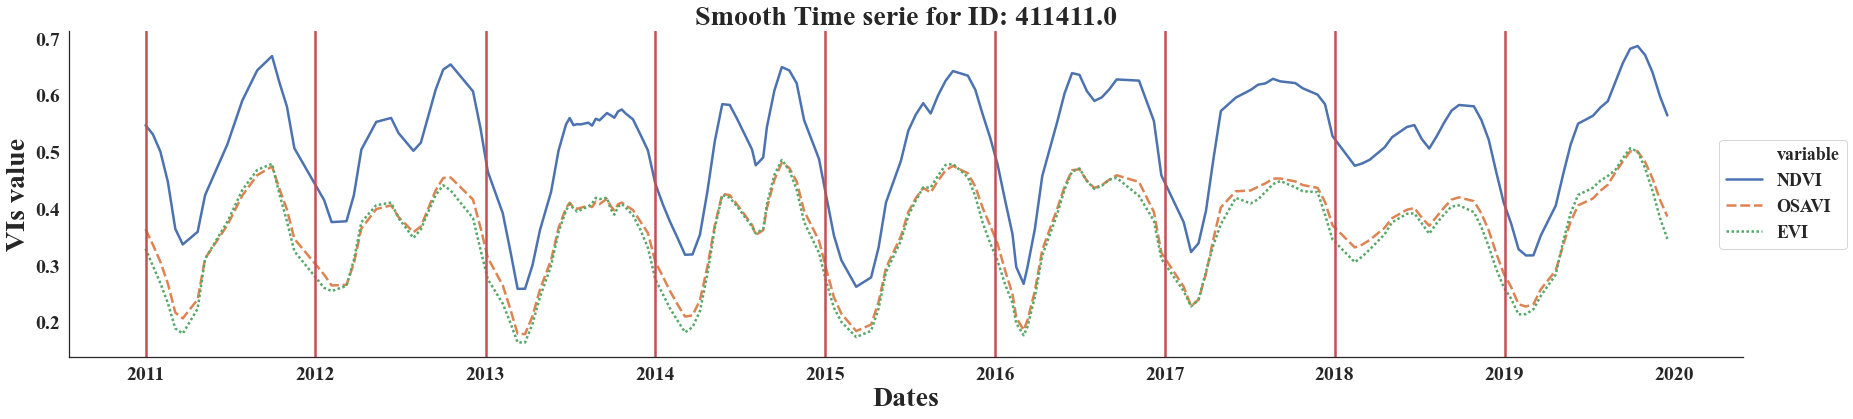

In [32]:
p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=melt_smooth)
p.set(xlabel='Dates', ylabel='VIs value',title="Smooth Time serie for ID: " + str(df1.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
  
handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# # p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
figure = p.get_figure()
# figure.savefig('Data_IDB/trends/TS_all-386511.png', dpi=600)

In [42]:
data = melt_smooth[melt_smooth.variable == "NDVI"]
y2013 = data[data.date <= "2011-12-31"]
# y2014 = data[data.date <= "2014-12-31"]
# y2014
# data
import pymannkendall as mk

result = mk.original_test(y2013.value) #period=12 
print(result[0])

no trend


# all time series raw

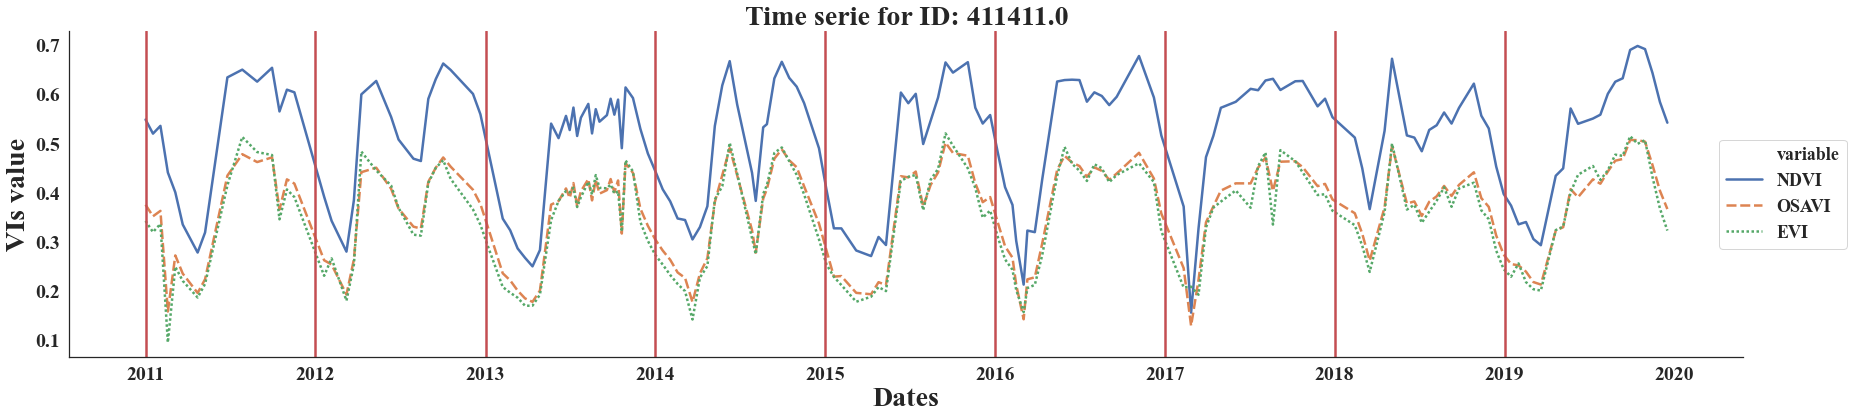

In [33]:
p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=melt_db)
p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df1.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
  
handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# # p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
figure = p.get_figure()
# figure.savefig('Data_IDB/trends/TS_all-386511.png', dpi=600)

# IMG PER YEAR

In [ ]:
years = np.unique(df1['date'].dt.year)
for year in years:
    df = df1[df1['date'].dt.year == year]
    p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=df)
    p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
    # p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')

    handles, labels = p.get_legend_handles_labels()
    lgd = dict(zip(labels, handles))
    p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
    sns.despine()
    # for inside  in DATE.inside:
    #     p.axvline(inside,color='r',label="start year")
    # # p.xticks(rotation=45)
    # p.tick_params(axis='x', labelrotation=90)
    figure = p.get_figure()
#     figure.savefig('Data_IDB/trends/TS_'+str(year)+'-386511.png', dpi=600)
#     plt.close(figure)

# PLOT TO PDF

In [ ]:
with PdfPages('kde.pdf') as pdf_pages:
    for i in range(1, 114):
        for j in range(0, 113):
            x=t1.iloc[:, i]
            y=t1.iloc[:, j]
            joint_grid = sns.jointplot(x=x, y=y, kind="kde", dropna=True)
            pdf_pages.savefig(joint_grid.fig)

In [ ]:
melt_db = df1.melt(["date","ID"], ["NDVI","OSAVI","EVI"] )

In [ ]:
p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=melt_smooth)
p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df1.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
  
handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# # p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
figure = p.get_figure()
# figure.savefig('Data_IDB/trends/TS_all-386511.png', dpi=600)

In [ ]:
p = sns.lineplot('date', 'value', hue='variable', style='variable',
             data=melt_db)
p.set(xlabel='Dates', ylabel='VIs value',title="Time serie for ID: " + str(df1.ID.iloc[0])) #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')
  
handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1)
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# # p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
figure = p.get_figure()
# figure.savefig('Data_IDB/trends/TS_all-386511.png', dpi=600)